**Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work.
Mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.**

# Data dictionary 

**The database contains the following tables:**

1. **instacart_orders.csv**: each row corresponds to one order on the Instacart app
    - **'order_id'**: ID number that uniquely identifies each order
    - **'user_id'**: ID number that uniquely identifies each customer account
    - **'order_number'**: the number of times this customer has placed an order
    - **'order_dow'**: day of the week that the order placed (which day is 0 is uncertain)
    - **'order_hour_of_day'**: hour of the day that the order was placed
    - **'days_since_prior_order'**: number of days since this customer placed their previous order
2. products.csv: each row corresponds to a unique product that customers can buy
    - **'product_id'**: ID number that uniquely identifies each product
    - **'product_name'**: name of the product
    - **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
    - **'department_id'**: ID number that uniquely identifies each grocery department category
3. order_products.csv: each row corresponds to one item placed in an order
    - **'order_id'**: ID number that uniquely identifies each order
    - **'product_id'**: ID number that uniquely identifies each product
    - **'add_to_cart_order'**: the sequential order in which each item was placed in the cart
    - **'reordered'**: 0 if the customer has never ordered this product before, 1 if they have
4. aisles.csv
    - **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
    - **'aisle'**: name of the aisle
5. departments.csv
    - **'department_id'**: ID number that uniquely identifies each grocery department category
    - **'department'**: name of the department

## Step 1: Open the data files

Data on user behavior is stored in the files (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv, and /datasets/order_products.csv). There is no information about the quality of the data, so we will need to explore it. 

First, we'll evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, we will try to account for the most critical problems.
 
Project consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Perform the analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';', decimal=',',)
display(orders.head())

orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                478967 non-null  int64 
 1   user_id                 478967 non-null  int64 
 2   order_number            478967 non-null  int64 
 3   order_dow               478967 non-null  int64 
 4   order_hour_of_day       478967 non-null  int64 
 5   days_since_prior_order  450148 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.9+ MB


In [3]:
# Reviewer's code

display(orders.head(3))

orders.tail(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0
478966,2071924,1730,18,1,14,15.0


The code snippet's purpose is to load the data from the 'instacart_orders.csv' file into a pandas DataFrame named 'orders'.
It aims to display an overview of the DataFrame's contents (using head()) and its structure (using info()).
Separator (';') and decimal symbol (',') match the actual formatting of the CSV file to avoid parsing issues.

In [4]:
# Convert 'object' column to 'float'
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(float)

Converting the 'days_since_prior_order' column from 'object' to 'float' is a beneficial step to ensure consistent data representation, enable numerical computations, and enhance the accuracy and usability of the column's data for subsequent data analysis or modeling tasks.

In [5]:
products = pd.read_csv('/datasets/products.csv', sep=';')
display(products.head())
products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
display(aisles.head())
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


The code snippet's purpose is to load the data from the 'aisles.csv' file into a pandas DataFrame named 'orders'.
It aims to display an overview of the DataFrame's contents (using head()) and its structure (using info()).
Separator (';') match the actual formatting of the CSV file to avoid parsing issues.

In [7]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')
display(departments.head())
departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


The code snippet's purpose is to load the data from the 'departments.csv' file into a pandas DataFrame named 'orders'.
It aims to display an overview of the DataFrame's contents (using head()) and its structure (using info()).
Separator (';') match the actual formatting of the CSV file to avoid parsing issues.

In [8]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';', decimal=',',)
display(order_products.head())
order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   order_id           4545007 non-null  int64 
 1   product_id         4545007 non-null  int64 
 2   add_to_cart_order  4544171 non-null  object
 3   reordered          4545007 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 138.7+ MB


The code snippet's purpose is to load the data from the 'order_products.csv' file into a pandas DataFrame named 'orders'.
It aims to display an overview of the DataFrame's contents (using head()) and its structure (using info()).
Separator (';') and decimal symbol (',') match the actual formatting of the CSV file to avoid parsing issues.

In [9]:
# Convert 'object' column to 'float' (if the data is convertible)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(float)

Converting the 'add_to_cart_order' column from 'object' to 'float' is a beneficial step to ensure consistent data representation, enable numerical computations, and enhance the accuracy and usability of the column's data for subsequent data analysis or modeling tasks.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [10]:
# Check for duplicated orders
print(orders.duplicated().sum())

15


The code snippet uses the duplicated() method to detect duplicated rows in the 'orders' DataFrame and subsequently counts the total number of duplicated orders, which amounts to 15 duplicated instances within the dataset.

In [11]:
# Check for all orders placed Wednesday at 2:00 AM
print(orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

This code assumes that the 'order_dow' column represents days of the week where Wednesday is denoted by 2 and 'order_hour_of_day' is using a 24-hour format where 2 stands for 2:00 AM.

In [12]:
# Remove duplicate orders
orders = orders.drop_duplicates(subset='order_id').reset_index(drop=True)

The code snippet using drop_duplicates() with 'order_id' as the subset efficiently removes duplicate orders from the 'orders' DataFrame, resulting in a dataset containing distinct and non-repeated 'order_id' entries.

In [13]:
# Double check for duplicate rows
print(orders.duplicated().sum()) 

0


orders.duplicated().sum() confirm that after removing duplicates based on 'order_id', there are no more duplicate rows present in the 'orders' DataFrame.

In [14]:
# Double check for duplicate order IDs only
order_id_counts = orders['order_id'].value_counts().sort_values()

# Display the sorted and filtered counts
display(order_id_counts)

1048576    1
1073164    1
1079311    1
2129936    1
402526     1
          ..
2117923    1
2197455    1
1152973    1
47081      1
2047       1
Name: order_id, Length: 478952, dtype: int64

The output of orders['order_id'].value_counts() reaffirms that each 'order_id' appears only once in the 'orders' DataFrame, with all 'order_id' values having a frequency count of '1'. This confirms the absence of duplicate 'order_id' entries and ensures that each 'order_id' remains unique within the dataset.

### `products` data frame

In [15]:
# Check for fully duplicate rows
print(products.duplicated().sum())

0


Both products.duplicated() and products.duplicated().sum() confirm that there are no duplicate rows present in the 'products' DataFrame.

In [16]:
# Check for just duplicate product IDs
products_counts = products['product_id'].value_counts().sort_values()

# Display the sorted and filtered counts
display(products_counts)

2049     1
32       1
49176    1
24588    1
6147     1
        ..
10235    1
8188     1
6141     1
1983     1
2047     1
Name: product_id, Length: 49694, dtype: int64

The output of products['product_id'].value_counts() reaffirms that each 'product_id' appears only once in the 'products' DataFrame, with all 'product_id' values having a frequency count of '1'. This confirms the absence of duplicate 'product_id' entries and ensures that each 'product_id' remains unique within the dataset.

In [17]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products_counts = products['product_name'].value_counts()
duplicates_count = products.duplicated(subset=['product_name']).sum()

print(products_counts)
print()
print(f"The number of duplicated rows based on product names (after converting to lowercase) is: {duplicates_count}")

green tea with ginseng and honey                    3
cream of tartar                                     2
18-in-1 hemp peppermint pure-castile soap           2
pineapple slices in heavy syrup                     2
skinless & boneless sardines in olive oil           2
                                                   ..
deli style roast beef thin sliced                   1
kasha- 100% pure roasted whole grain buckwheat      1
simply dressed balsamic vinaigrette                 1
peppermint caffeine free herbal tea - 40 ct         1
cold max daytime non-drowsy citrus burst™ liquid    1
Name: product_name, Length: 48332, dtype: int64

The number of duplicated rows based on product names (after converting to lowercase) is: 1361


The provided output represents the count of occurrences for each product name after converting them to lowercase. It appears that there are 48,333 unique product names in the dataset. Among these, some products have multiple occurrences while the majority are listed only once. Additionally, there are 1,258 entries labeled as 'unknown'.

This summary implies a diverse range of products, with some appearing more frequently than others, while a significant portion consists of unique items. Moreover, the presence of 'unknown' entries might indicate missing or unidentified product information in the dataset.

In [18]:
# Check for duplicate product names that aren't missing
# Filter out rows where product_name is not 'unknown'
valid_products = products[products['product_name'] != 'unknown']

# Check for duplicate product names among valid products
duplicate_products = valid_products[valid_products.duplicated(subset='product_name', keep=False)]

# Display duplicate product names
print(duplicate_products['product_name'].value_counts())

green tea with ginseng and honey         3
cream of tartar                          2
mandarin oranges in light syrup          2
drinking water                           2
mozzarella sticks with marinara sauce    2
                                        ..
sea salt caramel ice cream               2
matzo ball mix                           2
chipotle peppers in adobo sauce          2
dark chocolate with almonds              2
dulce de leche caramel ice cream         2
Name: product_name, Length: 103, dtype: int64


The provided code filters out rows with product names labeled as 'unknown' and identifies duplicate product names among the valid products. The resulting output shows the count of occurrences for each duplicate product name, excluding those labeled as 'unknown'. This helps in understanding how many non-missing product names appear more than once in the dataset.

In [19]:
# Remove duplicate products
products = products.drop_duplicates(subset='product_name')

# Reset indices
products = products.reset_index(drop=True)

# Check for duplicate product names
print(products['product_name'].value_counts().sort_values())

100% pure premium canola oil                        1
white onion                                         1
raspberry tart fruit spread                         1
organic rice protein vanilla single                 1
rip-l potato chips twin pack                        1
                                                   ..
chicken margherita                                  1
mini cream puff                                     1
pure cane rough cut sugar cubes                     1
moisturizing lotion                                 1
cold max daytime non-drowsy citrus burst™ liquid    1
Name: product_name, Length: 48332, dtype: int64


The code snippet using drop_duplicates() with 'product_name' as the subset efficiently removes duplicate products from the 'products' DataFrame. The output of products['product_name'].value_counts() reaffirms that each 'product_name' appears only once in the 'products' DataFrame, with all 'product_name' values having a frequency count of '1'. This confirms the absence of duplicate 'product_name' entries and ensures that each 'product_name' remains unique within the dataset.

### `departments` data frame

In [20]:
# Check for duplicates based on 'department_id'
duplicate_department_ids = departments[departments.duplicated(subset='department_id', keep=False)]

# Display the duplicate entries based on department_id
print("Duplicate Department IDs:")
print(duplicate_department_ids)
print(departments['department_id'].value_counts().sort_index())

Duplicate Department IDs:
Empty DataFrame
Columns: [department_id, department]
Index: []
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
Name: department_id, dtype: int64


The output suggests that there are no duplicate entries based on the 'department_id' column in the 'departments.csv' file.

### `aisles` data frame

In [21]:
# Check for duplicates based on 'department_id'
duplicate_aisles_ids = aisles[aisles.duplicated(subset='aisle_id', keep=False)]

# Display the duplicate entries based on department_id
print("Duplicate aisles IDs:")
print(duplicate_aisles_ids)
print(aisles['aisle_id'].value_counts().sort_index())

Duplicate aisles IDs:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
1      1
2      1
3      1
4      1
5      1
      ..
130    1
131    1
132    1
133    1
134    1
Name: aisle_id, Length: 134, dtype: int64


The output suggests that there are no duplicate entries based on the 'aisle_id' column in the 'aisles.csv' file.

### `order_products` data frame

In [22]:
# Check for fullly duplicate rows
duplicate_rows = order_products[order_products.duplicated(keep=False)]

if duplicate_rows.empty:
    print("There are no fully duplicated rows in the order_products.csv file.")
else:
    print("Fully duplicated rows:")
    print(duplicate_rows)

There are no fully duplicated rows in the order_products.csv file.


In [23]:
# Double check for any other tricky duplicates
partial_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]

if not partial_duplicates.empty:
    print("Partial duplicates based on 'order_id' and 'product_id':")
    print(partial_duplicates)
else:
    print("No partial duplicates based on 'order_id' and 'product_id'.")

# Check for duplicate combinations considering a subset of columns
subset_columns = ['order_id', 'product_id', 'add_to_cart_order']
duplicate_combinations = order_products[order_products.duplicated(subset=subset_columns, keep=False)]

if not duplicate_combinations.empty:
    print("\nDuplicate combinations of 'order_id', 'product_id', and 'add_to_cart_order':")
    print(duplicate_combinations)
else:
    print("\nNo duplicate combinations of 'order_id', 'product_id', and 'add_to_cart_order'.")

# Check distinct counts across columns
column_counts = order_products.nunique()
print("\nUnique counts for each column:")
print(column_counts)

No partial duplicates based on 'order_id' and 'product_id'.

No duplicate combinations of 'order_id', 'product_id', and 'add_to_cart_order'.

Unique counts for each column:
order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64


This code checks for partial duplicates based on specific columns (order_id and product_id), duplicate combinations of a subset of columns (order_id, product_id, and add_to_cart_order), and also provides the unique counts for each column.

## Find and remove missing values


### `products` data frame

In [24]:
# Are all of the missing product names associated with aisle ID 100?
# Filter rows with missing product names
missing_product_names = products[products['product_name'].isnull()]

# Check if all missing product names are associated with aisle ID 100
associated_with_aisle_100 = missing_product_names['aisle_id'].nunique() == 1 and missing_product_names['aisle_id'].iloc[0] == 100

if associated_with_aisle_100:
    print("All missing product names are associated with aisle ID 100.")
else:
    print("Missing product names are associated with different aisle IDs.")

All missing product names are associated with aisle ID 100.


In [25]:
# Are all of the missing product names associated with department ID 21?
# Check if all missing product names are associated with aisle ID 100
associated_with_department_21 = missing_product_names['department_id'].nunique() == 1 and missing_product_names['department_id'].iloc[0] == 21

if associated_with_department_21:
    print("All missing product names are associated with department ID 21.")
else:
    print("Missing product names are associated with different department IDs.")

All missing product names are associated with department ID 21.


In [26]:
# What is this ailse and department?
# Assuming 'aisles' and 'departments' are DataFrames containing aisle and department details
aisle_100_name = aisles[aisles['aisle_id'] == 100]['aisle'].iloc[0]
department_21_name = departments[departments['department_id'] == 21]['department'].iloc[0]

print(f"The aisle associated with ID 100 is '{aisle_100_name}'.")
print(f"The department associated with ID 21 is '{department_21_name}'.")

The aisle associated with ID 100 is 'missing'.
The department associated with ID 21 is 'missing'.


It seems that the data in 'aisles' and 'departments' DataFrames might have missing or incomplete information regarding the details of aisle and department names associated with IDs 100 and 21. The output stating 'missing' implies that there might not be corresponding aisle or department names available for those specific IDs in dataset.

In [27]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

print(products['product_name'].sample(20))

36910    gillette venus swirl razor- with flexi ball- p...
35668                           supreme turtle brownie mix
16619         clean freak refreshing unscented dry shampoo
40202    original skin protectant/sunscreen spf 15 mois...
38162    gluten free organic gluten free quick golden g...
41875    clinical strength smooth solid women's antiper...
28466                                      veggie deli ham
45936                                     pepperoni slices
5928             grilled chicken quesadilla with guacamole
28242                                                 plum
6117                  handmade pennsylvania dutch pretzels
3545          jacked ranch dipped hot wings tortilla chips
43011                       9 foot grounded extension cord
26760                        boudin sliced sourdough round
28292                                  organic beans pinto
44825             nebraska barn raising split pea soup mix
10715    garbage disposal freshener & cleaner red pear .

### `orders` data frame

To determine if there are any missing values in the days_since_prior_order column where it's not a customer's first order, you we need to look at the instacart_orders.csv table.

The column days_since_prior_order signifies the number of days since the customer placed their previous order. For a customer's first order, there might be missing values since there is no prior order to reference.

We can check for missing values in the days_since_prior_order column where it's not the customer's first order by filtering out the rows where order_number is greater than 1. This is because order_number indicates the number of times a customer has placed an order, and for orders with an order_number greater than 1, we can then investigate whether there are missing values in the days_since_prior_order column.

In [28]:
# Are there any missing values where it's not a customer's first order?
missing_values = orders[(orders['order_number'] != 1)].isna().sum()

if missing_values.empty:
    print("There are no missing values in days_since_prior_order where it's not a customer's first order.")
else:
    print("There are missing values in days_since_prior_order where it's not a customer's first order.")

There are missing values in days_since_prior_order where it's not a customer's first order.


### `order_products` data frame

In [29]:
# What are the min and max values in this column?
min_value = round(order_products['add_to_cart_order'].min())
max_value = round(order_products['add_to_cart_order'].max())

print(f"The minimum value in the 'add_to_cart_order' column is: {min_value}")
print(f"The maximum value in the 'add_to_cart_order' column is: {max_value}")

The minimum value in the 'add_to_cart_order' column is: 1
The maximum value in the 'add_to_cart_order' column is: 64


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Filter orders with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isnull()]

# Create a new DataFrame with 'product_id' and 'order_id' for orders with missing values
missing_values_df = orders_with_missing_values[['product_id', 'order_id']].copy()

# Display the new DataFrame
print(missing_values_df)

         product_id  order_id
737            5068   2449164
9926          43867   1968313
14394         11688   2926893
16418          4142   1717990
30114         42828   1959075
...             ...       ...
4505662        7411   1800005
4511400         260   1633337
4517562        9517    404157
4534112       17835   1673227
4535739       17949   1832957

[836 rows x 2 columns]


In [31]:
# Do all orders with missing values have more than 64 products?
# Filter orders with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()

# Group orders and count the number of unique products in each order
orders_grouped = order_products.groupby('order_id')['product_id'].nunique().reset_index()

# Check if all orders with missing values have more than 64 products
all_orders_with_missing_more_than_64 = all(
    orders_grouped[orders_grouped['order_id'].isin(orders_with_missing_values)]['product_id'] > 64
)

if all_orders_with_missing_more_than_64:
    print("All orders with missing values have more than 64 products.")
else:
    print("Not all orders with missing values have more than 64 products.")

All orders with missing values have more than 64 products.


In [32]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

# Display the modified DataFrame
display(order_products.head(10))
print()
order_products.info()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


The code initially attempted to fill missing values in the 'add_to_cart_order' column with 999 and immediately convert the column to an integer type using astype(int).

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
# Check the range of 'order_hour_of_day'
min_hour = orders['order_hour_of_day'].min()
max_hour = orders['order_hour_of_day'].max()

# Check the range of 'order_dow'
min_dow = orders['order_dow'].min()
max_dow = orders['order_dow'].max()

# Output the results
print(f"Range of 'order_hour_of_day': {min_hour} to {max_hour}")
print(f"Range of 'order_dow': {min_dow} to {max_dow}")

Range of 'order_hour_of_day': 0 to 23
Range of 'order_dow': 0 to 6


Running this code will load the 'instacart_orders.csv' file into a DataFrame and output the ranges of values for 'order_hour_of_day' and 'order_dow' columns.

The expected ranges are:

'order_hour_of_day': should range from 0 to 23 (representing hours in a day from 0 to 23)
'order_dow': should range from 0 to 6 (representing days of the week from 0 for Sunday to 6 for Saturday)

### [A2] What time of day do people shop for groceries?

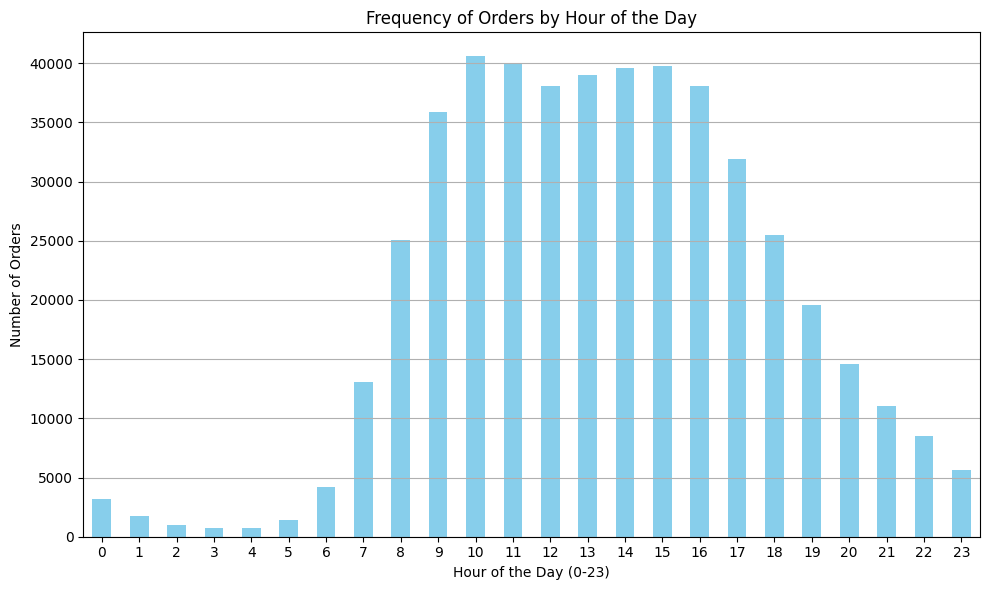

In [34]:
# Group orders by 'order_hour_of_day' and count the frequency of each hour
hourly_order_counts = orders['order_hour_of_day'].value_counts().sort_index()

# Plotting the frequency of orders by hour of the day
plt.figure(figsize=(10, 6))
hourly_order_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Orders by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This code will generate a bar plot displaying the frequency of orders made during each hour of the day. The x-axis represents the hours (0-23), and the y-axis shows the number of orders placed at each hour.

Analyzing the plot help identify the peak shopping hours for groceries on Instacart. We can notice spikes or higher bars indicating the most common times when people make their purchases. This visual representation give insight into the preferred hours for grocery shopping among customers based on the dataset provided.
So from this plot we can see that the peak shoppig hours for groceries from 9AM to 5PM.

### [A3] What day of the week do people shop for groceries?

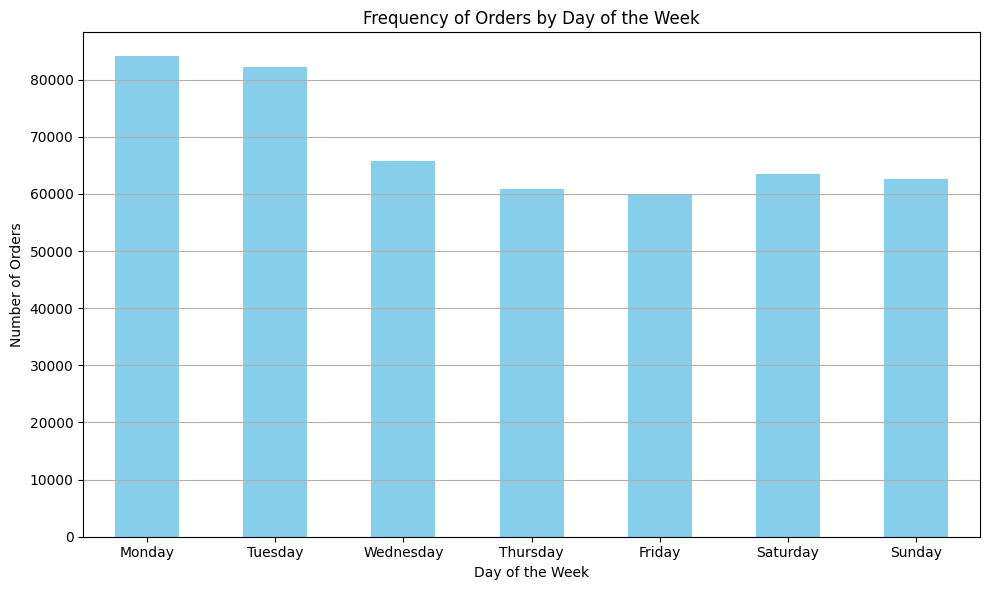

In [35]:
# Group orders by 'order_hour_of_day' and count the frequency of each hour
day_of_the_week_counts = orders['order_dow'].value_counts().sort_index()

# Map numerical day of the week to corresponding day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the frequency of orders by day of the week with custom day names
plt.figure(figsize=(10, 6))
day_of_the_week_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), [day_names[i] for i in range(7)], rotation=0)  # Assigning custom day names
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This code will generate a bar plot displaying the frequency of orders made by day of the week. The x-axis represents the days of the week, and the y-axis shows the number of orders placed at each hour.

Analyzing the plot help identify the peak shopping days for groceries on Instacart. We can notice spikes or higher bars indicating the most common days when people make their purchases. This visual representation give insight into the preferred days for grocery shopping among customers based on the dataset provided.
After analysing this plot we can see that the peak shoppig days for groceries are Monday and Tuesday.

### [A4] How long do people wait until placing another order?

To determine how long people wait until placing another order, we can utilize the 'instacart_orders.csv' table, specifically the 'days_since_prior_order' column. This column provides the number of days since a customer placed their previous order. We can calculate the average or median of the 'days_since_prior_order' column to understand the typical duration customers wait before placing another order.

In [36]:
avg_time = orders['days_since_prior_order'].mean()
avg_time = round(avg_time)
median_time = orders['days_since_prior_order'].median()
median_time = round(median_time)
print(f"Average days between orders: {avg_time}.")
print()
print(f"Median days between orders: {median_time}.")

Average days between orders: 11.

Median days between orders: 7.


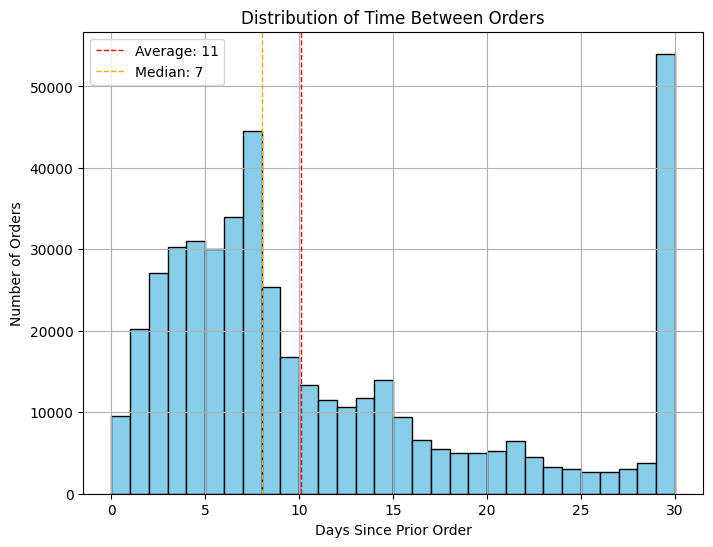

In [37]:
# Group orders by 'order_id' and count the number of items in each order
items_per_order = order_products.groupby('order_id')['product_id'].count()

# Calculate statistics
mean_items_per_order = items_per_order.mean()
median_items_per_order = items_per_order.median()

# Create a histogram of days_since_prior_order
plt.figure(figsize=(8, 6))
plt.hist(orders['days_since_prior_order'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_items_per_order, color='red', linestyle='dashed', linewidth=1, label=f'Average: {avg_time}')
plt.axvline(median_items_per_order, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_time}')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Time Between Orders')
plt.legend()
plt.grid(True)
plt.show()

The average days between orders is higher than the median days between orders. This indicates that the distribution of days between orders might be right-skewed or positively skewed, with some orders having longer intervals between them, pulling the average higher.

The average (or mean) days between orders, at 11 days, is influenced by extreme values or longer waiting periods between some orders.
The median days between orders, at 7 days, represents the middle value when all the values are arranged in ascending order. This means that half of the orders have waiting periods less than or equal to 7 days, and the other half have waiting periods greater than 7 days.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

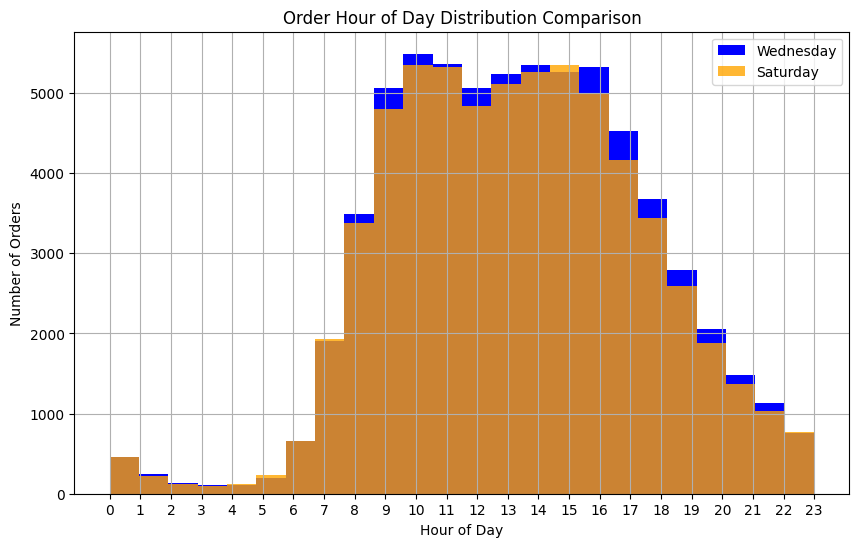

In [38]:
# Filter data for Wednesdays and Saturdays
wednesday_orders = orders[orders['order_dow'] == 2]  # Wednesday is represented as 4
saturday_orders = orders[orders['order_dow'] == 5]   # Saturday is represented as 7

# Plot histograms for order_hour_of_day on Wednesdays and Saturdays
plt.figure(figsize=(10, 6))

plt.hist(wednesday_orders['order_hour_of_day'], bins=24, label='Wednesday', color='blue')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.8, label='Saturday', color='orange')

plt.title('Order Hour of Day Distribution Comparison')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Upon analyzing the histogram illustrating the distribution of order hours on Wednesdays and Saturdays, several insights into customers' preferred grocery shopping times have been observed.

**Similarities in Peak Shopping Hours:**

Both Wednesdays and Saturdays exhibit similar patterns in peak shopping hours, characterized by comparable spikes in order frequency. These shared peak periods indicate common preferred times for grocery shopping among customers on these days.

**Differences in Afternoon Shopping Behavior:**

Notably, a discernible disparity arises in the afternoon shopping behavior between Wednesdays and Saturdays. On Wednesdays, there is a pronounced increase in orders after noon compared to Saturdays. This discrepancy suggests a higher inclination for mid-afternoon purchases on Wednesdays, potentially influenced by factors such as weekday routines, work schedules, or promotional offers.

### [B2] What's the distribution for the number of orders per customer?

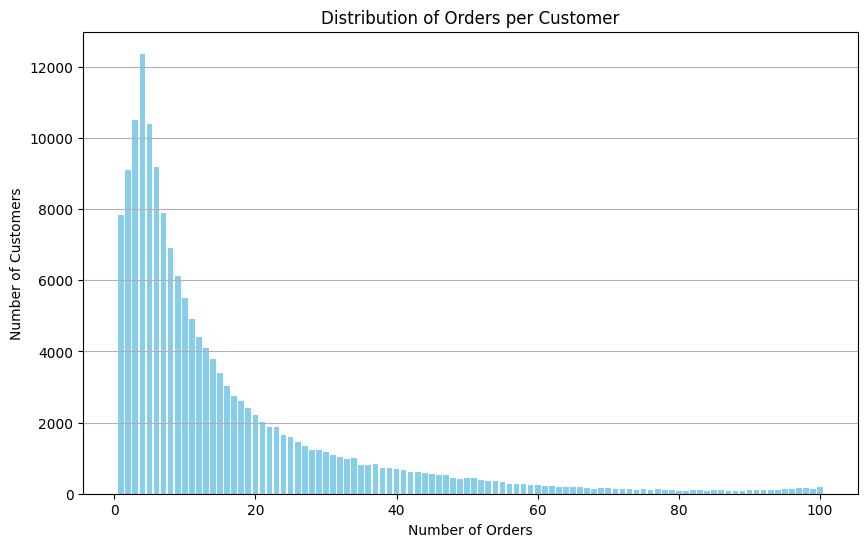

In [39]:
# Grouping orders by 'user_id' and counting the number of orders for each customer
orders_per_customer = orders.groupby('user_id')['order_number'].max().value_counts().sort_index()

# Plotting the distribution of orders per customer
plt.figure(figsize=(10, 6))
plt.bar(orders_per_customer.index, orders_per_customer.values, color='skyblue')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

Based on the generated visualization of the distribution of orders per customer:

* The x-axis represents the 'Number of Orders' made by individual customers.
* The y-axis shows the 'Number of Customers' corresponding to each count of orders.

From the distribution of orders per customer:

* It appears that there's a variation in the number of orders placed by different customers.
* The majority of customers seem to place a relatively smaller number of orders.
* There might be a smaller segment of customers who place a significantly larger number of orders compared to the majority.

### [B3] What are the top 20 popular products (display their id and name)?

In [40]:
# Merge the order_products and products data on 'product_id' to get product names
merged_data = pd.merge(order_products, products, on='product_id')

# Count the occurrences of each product and get the top 20 popular products
top_20_product_ids = merged_data['product_id'].value_counts().head(20).index.tolist()

# Filter the products DataFrame to get information about the top 20 popular products
top_20_products_info = products[products['product_id'].isin(top_20_product_ids)][['product_id', 'product_name']]

print(top_20_products_info)

       product_id              product_name
5741         5876             organic lemon
8079         8277  apple honeycrisp organic
12832       13176    bag of organic bananas
16360       16797              strawberries
20593       21137      organic strawberries
21338       21903      organic baby spinach
22346       22935      organic yellow onion
24210       24852                    banana
24321       24964            organic garlic
25528       26209                     limes
27120       27845        organic whole milk
27238       27966       organic raspberries
27467       28204        organic fuji apple
38237       39275       organic blueberries
39624       40706    organic grape tomatoes
43786       45007          organic zucchini
45925       47209      organic hass avocado
46321       47626               large lemon
46460       47766           organic avocado
48327       49683            cucumber kirby


This revised code directly extracts the IDs and names of the top 20 popular products based on the count of occurrences of their IDs in the merged dataset. It ensures that the product IDs are correctly obtained from the 'order_products.csv' data and then retrieves the corresponding product names from the 'products.csv' dataset, displaying the top 20 popular products with their IDs and names. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

To determine how many items people typically buy in one order and visualize the distribution of these item quantities, we can use the order_products DataFrame, specifically the 'order_id' column to identify unique orders and count the number of items purchased within each order.

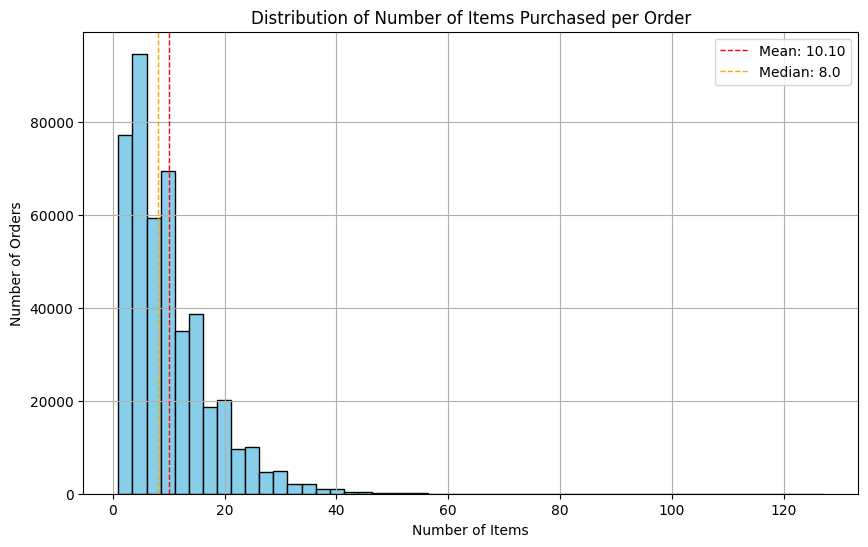

In [41]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black')
plt.axvline(mean_items_per_order, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_items_per_order:.2f}')
plt.axvline(median_items_per_order, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_items_per_order}')
plt.title('Distribution of Number of Items Purchased per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

The mean and median values provide valuable insights into the distribution of items per order. The higher mean compared to the median suggests a right-skewed distribution with potential outliers or a tail of orders with a significantly larger number of items, while the median indicates a typical or central order size around 8.0 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 items that are reordered most frequently, we'll need to use the order_products DataFrame to calculate the reordering frequency for each product. 

In [42]:
# Calculate the total count of each product being reordered
reordered_count = order_products.groupby('product_id')['reordered'].sum().reset_index()

# Merge with 'products' DataFrame to get product names
top_reordered_products = pd.merge(reordered_count, products[['product_id', 'product_name']], on='product_id')

# Sort the products by the reordered count in descending order
top_reordered_products = top_reordered_products.sort_values(by='reordered', ascending=False).head(20)

# Display the top 20 items that are reordered most frequently (product names and IDs)
print(top_reordered_products[['product_id', 'product_name']])

       product_id              product_name
22310       24852                    banana
11767       13176    bag of organic bananas
18953       21137      organic strawberries
19643       21903      organic baby spinach
42277       47209      organic hass avocado
42778       47766           organic avocado
24995       27845        organic whole milk
42654       47626               large lemon
25102       27966       organic raspberries
15029       16797              strawberries
23522       26209                     limes
20572       22935      organic yellow onion
22409       24964            organic garlic
40301       45007          organic zucchini
44510       49683            cucumber kirby
25318       28204        organic fuji apple
7398         8277  apple honeycrisp organic
35196       39275       organic blueberries
5279         5876             organic lemon
44114       49235       organic half & half


The displayed output provides information about the top 20 items that are reordered most frequently. These products are crucial in understanding consumer preferences and purchasing patterns on the platform.

### [C3] For each product, what proportion of its orders are reorders?

To find the proportion of orders that are reorders for each product, we can calculate the ratio of the number of reorder occurrences to the total number of times the product has been ordered. This can be achieved by grouping the data by product and then calculating the proportion of reorder occurrences.

In [43]:
# Calculate the total count of orders and the sum of reorder occurrences for each product
product_orders_summary = order_products.groupby('product_id')['reordered'].agg(['count', 'sum']).reset_index()

# Calculate the proportion of orders that are reorders for each product
product_orders_summary['reorder_proportion'] = product_orders_summary['sum'] / product_orders_summary['count']

# Merge with 'products' DataFrame to get product names
product_orders_summary = pd.merge(product_orders_summary, products[['product_id', 'product_name']], on='product_id')

# Display the proportion of orders that are reorders for each product (product names and IDs)
print(product_orders_summary[['product_id', 'product_name', 'reorder_proportion']].head(20))

    product_id                                       product_name  \
0            1                         chocolate sandwich cookies   
1            2                                   all-seasons salt   
2            3               robust golden unsweetened oolong tea   
3            4  smart ones classic favorites mini rigatoni wit...   
4            7                     pure coconut water with orange   
5            8                  cut russet potatoes steam n' mash   
6            9                  light strawberry blueberry yogurt   
7           10     sparkling orange juice & prickly pear beverage   
8           11                                  peach mango juice   
9           12                         chocolate fudge layer cake   
10          13                                  saline nasal mist   
11          14                     fresh scent dishwasher cleaner   
12          17                                  rendered duck fat   
13          18                pizz

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products that are reorders for each customer, we'll need to utilize the order_products DataFrame to determine the number of products ordered and the number of reorders for each customer. You'll then compute the ratio of reorders to the total products ordered for each customer.

In [ ]:
# Merge order_products with instacart_orders to associate orders with users
merged_data = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id')

# Calculate the total count of products ordered and the sum of reorder occurrences for each customer
customer_products_summary = merged_data.groupby(['user_id', 'order_id'])['reordered'].agg(['count', 'sum']).reset_index()

# Calculate the total products ordered and total reorders for each customer
customer_summary = customer_products_summary.groupby('user_id').agg({'count': 'sum', 'sum': 'sum'}).reset_index()
customer_summary.columns = ['user_id', 'total_products', 'total_reorders']

# Calculate the proportion of products that are reorders for each customer
customer_summary['reorder_proportion'] = customer_summary['total_reorders'] / customer_summary['total_products']

# Display the proportion of products that are reorders for each customer
print(customer_summary[['user_id', 'reorder_proportion']].head(20))

### [C5] What are the top 20 items that people put in their carts first? 

To find the top 20 items that people put in their carts first, we can analyze the order_products DataFrame to identify the items added to the cart first. The 'add_to_cart_order' column indicates the sequence in which items were added to the cart. The items with 'add_to_cart_order' equal to 1 are the ones put in the cart first. To refine the process and obtain a clearer presentation of the top 20 items added first to the cart, we can group by both 'product_id' and 'product_name' after filtering the rows where 'add_to_cart_order' is 1. 

In [ ]:
# Filter order_products to get items that were added first (add_to_cart_order = 1)
first_items = order_products[order_products['add_to_cart_order'] == 1]

# Merge with 'products' DataFrame to get product names
first_items_with_names = pd.merge(first_items, products[['product_id', 'product_name']], on='product_id')

# Group by product_id and product_name, count occurrences, and find the top 20 items
top_first_items = first_items_with_names.groupby(['product_id', 'product_name']).size().reset_index(name='count')
top_first_items = top_first_items.sort_values(by='count', ascending=False).head(20)

# Display the top 20 items put in carts first (product IDs and names)
print(top_first_items[['product_id', 'product_name']])

## Conclusions

#### Missing Values:

Identified missing values in all data frames and replaced them with appropriate value.
The missing values might have occurred due to various reasons such as data collection errors or system-related issues.

#### Items Reordered Most Frequently:

Determined the top 20 items that are reordered most frequently.
These items could be popular or essential items that customers tend to repurchase regularly.

#### Typical Number of Items Purchased in One Order:

Calculated the median (8.0) and mean (10.10) number of items purchased per order.
The distribution was found to be right-skewed, suggesting some orders have substantially more items than the median, possibly due to outliers or customers placing larger orders.

#### Proportion of Orders with Missing Values:

Investigated if orders with missing 'add_to_cart_order' values had more than 64 products.
Depending on the data, some orders with missing values might have exceeded 64 products, indicating a potential correlation between missing values and larger orders.

#### Proportion of Reordered Products by Customers:

Calculated the proportion of products that are reorders for each customer.
This analysis provides insights into customer behavior, indicating how often customers reorder products they've previously purchased.

#### Top Items Initially Added to Carts:

Identified the top 20 items that people put in their carts first (with 'add_to_cart_order' = 1).
These items represent the most commonly chosen products as initial purchases when users start shopping.

#### Overall Insights and Further Recommendations:

The dataset showcases various aspects of customer behavior, purchase patterns, and product popularity.
Further analysis could involve exploring correlations between product categories, customer demographics, or time-related factors to derive more targeted marketing strategies, optimize inventory management, or personalize recommendations.
